# MNIST 数据集

MNIST 数据集来自美国国家标准与技术研究所, National Institute of Standards and Technology (NIST). 训练集 (training set) 由来自 250 个不同人手写的数字构成, 其中 50% 是高中学生, 50% 来自人口普查局 (the Census Bureau) 的工作人员.

In [3]:
# tensorflow 已经提供了一个文件 'input_data.py' 用来读入数据
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import input_data

%matplotlib inline
# 内联matplot

MNIST数据集是一个带标签的数据集，也就是对于每张手写数字，都附带一个标签表示这个数字是什么。

Extracting mnist_data/train-images-idx3-ubyte.gz
Extracting mnist_data/train-labels-idx1-ubyte.gz
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Extracting mnist_data/t10k-labels-idx1-ubyte.gz
训练数据张数: 55000
每张图片的形状 (784,)


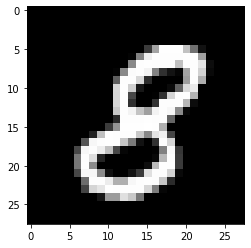

这张图片的标签是: 8


In [5]:
dataset = input_data.read_data_sets('mnist_data/', one_hot=False)
# 参数是数据所在的路径，如果文件不存在则会自动下载
# 但是数据是国外的，下载很慢，所以我提供了数据文件

idx = 5

image = dataset.train.images
label = dataset.train.labels

test_image = dataset.test.images
test_label = dataset.test.labels

print ('训练数据张数:', len(image))

img1_vec = image[idx]
print('每张图片的形状', img1_vec.shape)

# MNIST的每一张图片都是28 * 28的大小
# 但是为了存储方便，将图片展平为1维向量，维度为28*28 = 784
# 为了显示图片，我们把图片reshape

img1 = np.reshape(img1_vec, (28, 28))
# print (img1)
# MNIST的图片是灰度图，每个像素用一个0~1的数值表示，0表示黑色，1表示白色

plt.imshow(img1, cmap='gray') # 用灰度(gray)的方式显示图片
plt.show()

print('这张图片的标签是:', label[idx])

# 通俗的解释什么是Tensor

TensorFlow这个名字，由两个部分构成，分别是Tensor(张量)和Flow(流),而张量就是tensorflow里面非常重要的一个内容，那么，什么是张量呢？

张量是现代机器学习的基础。它的核心是一个数据容器，多数情况下，它包含数字，有时候它也包含字符串，但这种情况比较少。

![](pic\1.jpg)

这里直接举例子：
 - 1.标量，可以看成0维的张量
 - 2.向量，可以看成1维的张量
 - 3.矩阵，可以看作2维的张量
 - 4....
 
 其实我个人倾向于把张量理解为类似数组的存在。
 
 所以对于MNIST数据集，每一张图片都可以看作一个张量(reshape前是1维tensor，reshape后是2维)，如果我们把更多的图片同时堆叠在一起，则会构成更高维的张量。这些张量的核心都是一个包含数字的容器(图片中的每一个元素值都是0~1之间的)
 
# 如何理解Flow

做深度学习，可以说是找一个模型，这个模型是将输入对应到输出上的，就像一个函数，我输入特定的手写数字，然后函数输出这个数字是多少。

在TensorFlow中，有一个核心概念，叫计算图谱，就类似于下图。图中每一个操作都是一个节点(椭圆形)，而每一条边(黑色的有向曲线)都是一个张量。模型计算的过程中张量传播的过程类似下图，就像张量在流动一样

![](pic\2.gif)

# 如何预测手写数字？

为了预测手写数字，我们需要搭建一个模型，模型的搭建当然是使用tensorflow了

### keras简介

Keras 是一个用 Python 编写的高级神经网络 API，其对用户友好，模块化，易扩展性，基于 Python 实现，是tensorflow2.0指定的唯一高阶API。既然是高阶API，那么构建网络还是会很方便的，因为忽略了许多底层的细节。本系列课程基本上使用的都是keras。

在tensorflow中使用keras可以这样：
 - 1. 使用tf.keras
 - 2. import tensorflow.keras as keras

### 模型构建

模型这个东西，接受输入，得到输出，因此我们需要先定义模型的输入。

keras提供了方法：keras.Input(shape, ...)来定义模型的输入

我们的手写数字图片是28 * 28 = 784维的一个向量，因为图片的大小是固定的，因此每一个向量可以确定唯一一张图片，因此我们对于输入图片就不reshape了，直接以784维的向量作为输入，那么有：

In [6]:
input_ = tf.keras.Input(shape=(784, ))

接下来，我们向模型中加入一层网络：Dense，又叫稠密层或全连接层。

该层接受一个维数确定(固定)的向量，输出一个新的维数固定的向量。

keras提供了方法：keras.layers.Dense(output_dim)，参数是输出的维度大小

直观的想一下，我们手写数字识别，输出的就是这个数字是什么咯，所以输出的是一个标量，那么我们就让output_dim=1不就好了。

于是，模型的输出也就有了：！

In [7]:
result = tf.keras.layers.Dense(1)(input_)
# tf.keras.layers.Dense(1)是一层网络，后面再接(input_)表示用input_作为该层的输出

OK, 有了输入和输出，我们就可以把他们联系在一起，变成一个模型了！

keras提供了keras.Model(inputs=,outputs=)来搭建一个模型

In [8]:
model = tf.keras.Model(inputs=input_, outputs=result)
model.summary() # 查看模型的信息
model.compile(loss='mse') # 编译模型，这一步操作是训练之前必须进行的，目的是绑定优化器，损失函数，还有一些指标

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 785       
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


# 训练
这种我们随便生成的模型，能正确预测数字的可能性微乎其微，它就像新生的婴儿一样，还什么都不知道，因此，为了成功预测，我们还需要进行训练

一个模型如果编译之后，就可以进行训练，keras提供了Model.fit(x, y, epochs, ...)，其中x是模型的输入，y是正确的标签，epochs是训练的轮数。

训练的原理大致是模型根据输出得到预测，优化器根据模型预测值与真实值的差距，反向的惩罚模型，使模型更趋向于正确的预测。

In [9]:
model.fit(x=image, y=label, epochs=20)

Train on 55000 samples
Epoch 1/20
55000/55000 [==============================] - 5s 98us/sample - loss: 4.4023
Epoch 2/20
55000/55000 [==============================] - 4s 68us/sample - loss: 3.5798
Epoch 3/20
55000/55000 [==============================] - 4s 68us/sample - loss: 3.4448
Epoch 4/20
55000/55000 [==============================] - 4s 67us/sample - loss: 3.3768
Epoch 5/20
55000/55000 [==============================] - 4s 68us/sample - loss: 3.3373
Epoch 6/20
55000/55000 [==============================] - 4s 68us/sample - loss: 3.3139
Epoch 7/20
55000/55000 [==============================] - 4s 68us/sample - loss: 3.2960
Epoch 8/20
55000/55000 [==============================] - 4s 72us/sample - loss: 3.2884
Epoch 9/20
55000/55000 [==============================] - 4s 72us/sample - loss: 3.2807
Epoch 10/20
55000/55000 [==============================] - 4s 74us/sample - loss: 3.2802
Epoch 11/20
55000/55000 [==============================] - 4s 73us/sample - loss: 3.2752
Epoch 1

神经网络预测： tf.Tensor([[6.428426]], shape=(1, 1), dtype=float32) 真实值: 7


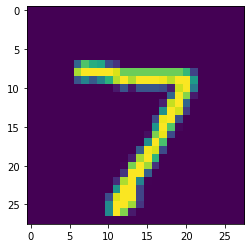

神经网络预测： tf.Tensor([[2.4002278]], shape=(1, 1), dtype=float32) 真实值: 2


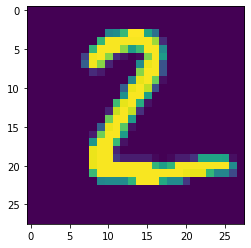

神经网络预测： tf.Tensor([[1.7015195]], shape=(1, 1), dtype=float32) 真实值: 1


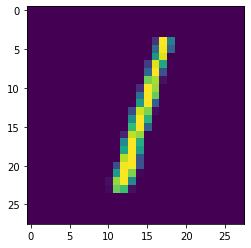

神经网络预测： tf.Tensor([[1.2078879]], shape=(1, 1), dtype=float32) 真实值: 0


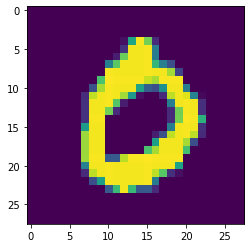

神经网络预测： tf.Tensor([[4.5436473]], shape=(1, 1), dtype=float32) 真实值: 4


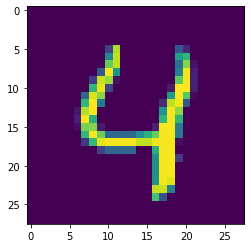

神经网络预测： tf.Tensor([[1.6842158]], shape=(1, 1), dtype=float32) 真实值: 1


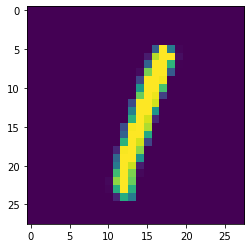

神经网络预测： tf.Tensor([[7.091626]], shape=(1, 1), dtype=float32) 真实值: 4


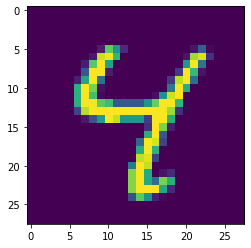

神经网络预测： tf.Tensor([[6.9076195]], shape=(1, 1), dtype=float32) 真实值: 9


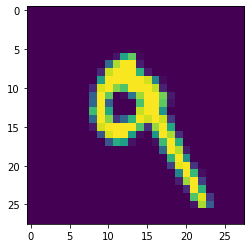

神经网络预测： tf.Tensor([[3.8047657]], shape=(1, 1), dtype=float32) 真实值: 5


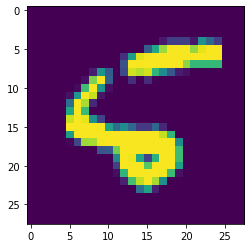

神经网络预测： tf.Tensor([[8.6507015]], shape=(1, 1), dtype=float32) 真实值: 9


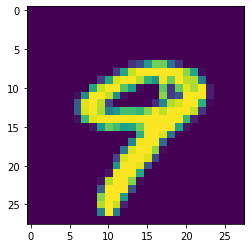

神经网络预测： tf.Tensor([[1.3660698]], shape=(1, 1), dtype=float32) 真实值: 0


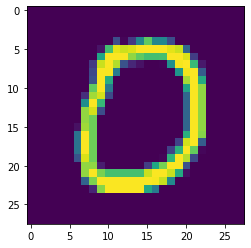

神经网络预测： tf.Tensor([[3.1290386]], shape=(1, 1), dtype=float32) 真实值: 6


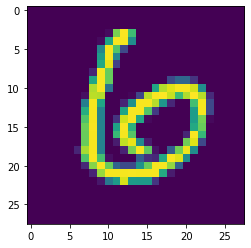

神经网络预测： tf.Tensor([[7.296026]], shape=(1, 1), dtype=float32) 真实值: 9


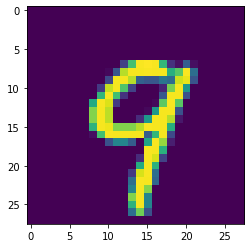

神经网络预测： tf.Tensor([[2.4856668]], shape=(1, 1), dtype=float32) 真实值: 0


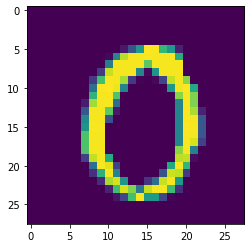

神经网络预测： tf.Tensor([[1.5466554]], shape=(1, 1), dtype=float32) 真实值: 1


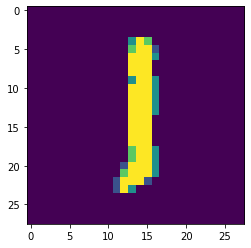

神经网络预测： tf.Tensor([[4.049768]], shape=(1, 1), dtype=float32) 真实值: 5


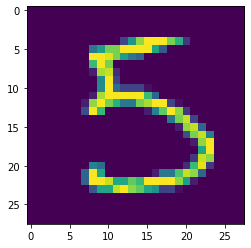

神经网络预测： tf.Tensor([[6.6700554]], shape=(1, 1), dtype=float32) 真实值: 9


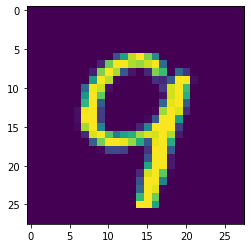

神经网络预测： tf.Tensor([[4.435921]], shape=(1, 1), dtype=float32) 真实值: 7


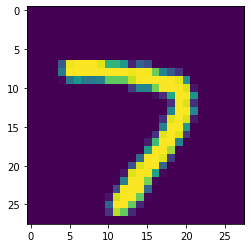

神经网络预测： tf.Tensor([[4.700768]], shape=(1, 1), dtype=float32) 真实值: 3


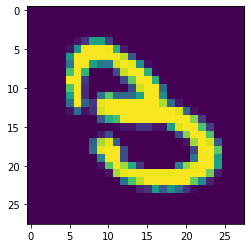

神经网络预测： tf.Tensor([[4.638806]], shape=(1, 1), dtype=float32) 真实值: 4


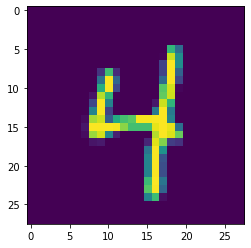

In [12]:
for i in range(20):
    img_show = np.reshape(test_image[i], [28, 28])
    pred = model(tf.expand_dims(test_image[i], axis=0))
    true_label = test_label[i]
    print ('神经网络预测：', pred, '真实值:', true_label)
    plt.imshow(img_show)
    plt.show()

可以看到，这么简单的模型，效果并不算太好。那么如果我们把模型变得更复杂一些呢？

比如，我们再在模型中加入一层Dense网络，并且为每一层网络加上非线性的激活函数：

In [13]:
input_2 = tf.keras.Input(shape=(784, ))
dense1 = tf.keras.layers.Dense(128, activation='tanh')(input_2)
dense2 = tf.keras.layers.Dense(32, activation='tanh')(dense1)
out = tf.keras.layers.Dense(1)(dense2)

model_2 = tf.keras.Model(inputs=input_2, outputs=out)
model_2.summary()
model_2.compile(loss='mse')

model_2.fit(x=image, y=label, epochs=20)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 104,641
Trainable params: 104,641
Non-trainable params: 0
_________________________________________________________________
Train on 55000 samples
Epoch 1/20
55000/55000 [==============================] - 5s 99us/sample - loss: 1.3476
Epoch 2/20
55000/55000 [==============================] - 5s 88us/sample - loss: 0.6565
Epoch 3/20
55000/55000 [============================

神经网络预测： tf.Tensor([[6.9613]], shape=(1, 1), dtype=float32) 真实值: 7


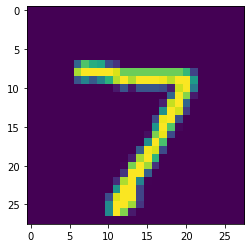

神经网络预测： tf.Tensor([[1.8860664]], shape=(1, 1), dtype=float32) 真实值: 2


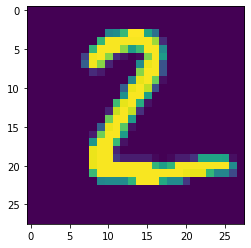

神经网络预测： tf.Tensor([[0.80503577]], shape=(1, 1), dtype=float32) 真实值: 1


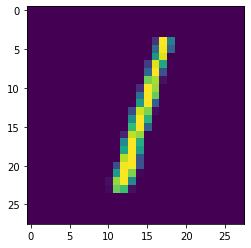

神经网络预测： tf.Tensor([[-0.00372653]], shape=(1, 1), dtype=float32) 真实值: 0


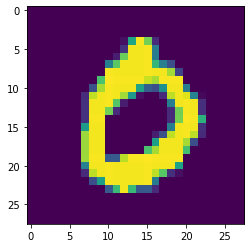

神经网络预测： tf.Tensor([[3.9897997]], shape=(1, 1), dtype=float32) 真实值: 4


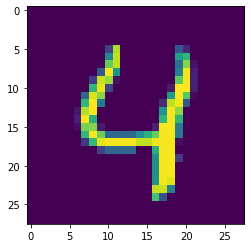

神经网络预测： tf.Tensor([[0.8983716]], shape=(1, 1), dtype=float32) 真实值: 1


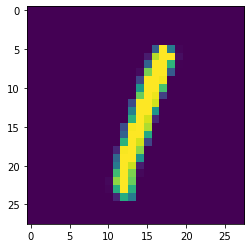

神经网络预测： tf.Tensor([[3.836075]], shape=(1, 1), dtype=float32) 真实值: 4


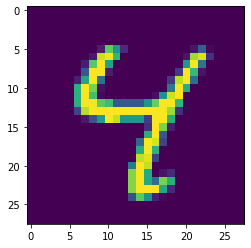

神经网络预测： tf.Tensor([[6.091246]], shape=(1, 1), dtype=float32) 真实值: 9


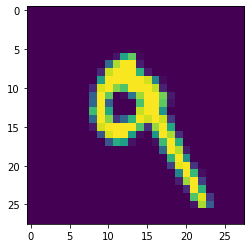

神经网络预测： tf.Tensor([[5.5979557]], shape=(1, 1), dtype=float32) 真实值: 5


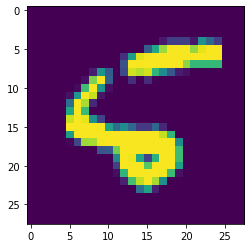

神经网络预测： tf.Tensor([[8.994173]], shape=(1, 1), dtype=float32) 真实值: 9


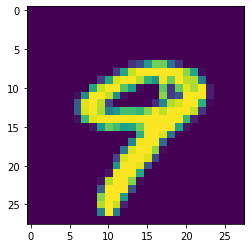

神经网络预测： tf.Tensor([[-0.0104826]], shape=(1, 1), dtype=float32) 真实值: 0


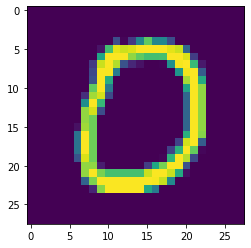

神经网络预测： tf.Tensor([[5.7070723]], shape=(1, 1), dtype=float32) 真实值: 6


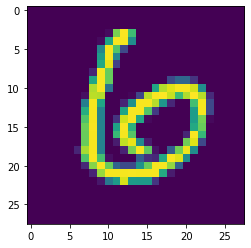

神经网络预测： tf.Tensor([[8.985319]], shape=(1, 1), dtype=float32) 真实值: 9


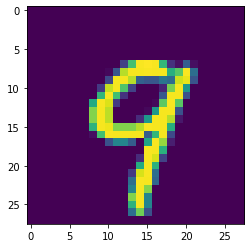

神经网络预测： tf.Tensor([[-0.00614702]], shape=(1, 1), dtype=float32) 真实值: 0


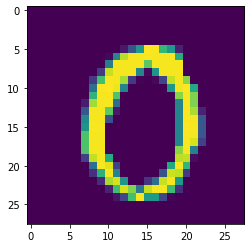

神经网络预测： tf.Tensor([[0.961602]], shape=(1, 1), dtype=float32) 真实值: 1


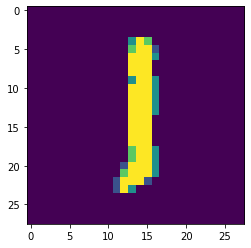

神经网络预测： tf.Tensor([[4.9782743]], shape=(1, 1), dtype=float32) 真实值: 5


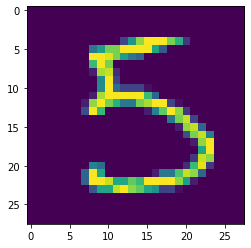

神经网络预测： tf.Tensor([[8.981458]], shape=(1, 1), dtype=float32) 真实值: 9


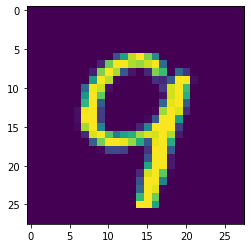

神经网络预测： tf.Tensor([[6.9647374]], shape=(1, 1), dtype=float32) 真实值: 7


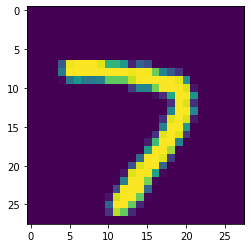

神经网络预测： tf.Tensor([[3.9137218]], shape=(1, 1), dtype=float32) 真实值: 3


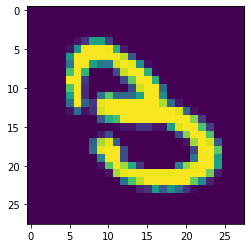

神经网络预测： tf.Tensor([[3.9924748]], shape=(1, 1), dtype=float32) 真实值: 4


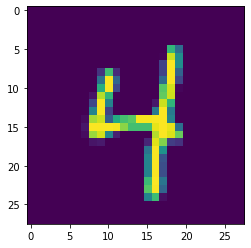

In [14]:
for i in range(20):
    img_show = np.reshape(test_image[i], [28, 28])
    pred = model_2(tf.expand_dims(test_image[i], axis=0))
    true_label = test_label[i]
    print ('神经网络预测：', pred, '真实值:', true_label)
    plt.imshow(img_show)
    plt.show()

这样看上去效果好像好了很多，但是，模型的预测值并不是只有0~9这10个离散的数字，而是连续的，环绕在真实值周围，这样其实不太精确，有没有什么更好的办法，使网络能够将预测值约束在0~9这10个可能性内？

一个很好且很通用的方法是，不让神经网络输出一个标量，代表预测的数字，而是让神经网络分别预测出10个数，分别代表神经网络认为图片是哪个数字的概率，概率越高可能性越大。

这样的话，我们网络的output_dim就应该等于10了，10表示有10个种类

In [18]:
input_3 = tf.keras.Input(shape=(784, ))
dense3 = tf.keras.layers.Dense(128, activation='tanh')(input_3)
out_2 = tf.keras.layers.Dense(10, activation='softmax')(dense3)

model_3 = tf.keras.Model(inputs=input_3, outputs=out_2)
model_3.summary()
model_3.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

model_3.fit(x=image, y=label, epochs=20)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Train on 55000 samples
Epoch 1/20
55000/55000 [==============================] - 4s 80us/sample - loss: 0.2909 - accuracy: 0.9144
Epoch 2/20
55000/55000 [==============================] - 4s 75us/sample - loss: 0.1492 - accuracy: 0.9563
Epoch 3/20
55000/55000 [==============================] - 4s 74us/sample - loss: 0.1075 - accuracy: 0.9688
Epoch 4/20
55000/55000 [===============

In [19]:
model_3.evaluate(x=test_image, y=test_label)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.09363231563876034, 0.9753]

# 问题
看完这一集视频，想必大家多多少少会有一些疑问，比如：
 - 1.我们往模型里加入的网络层到底是什么，他是怎么工作的，它是凭什么可以学会手写数字的预测？
 - 2.什么是优化器，什么是损失函数，为什么训练模型需要这两个东西？训练模型又是基于什么原理？
 - 3.为什么在简单的模型上加了两层网络，模型的预测能力会提高，什么是非线性激活函数？有没有线性激活函数，激活函数都有哪些？
 - 当然也欢迎大家提出自己的问题，我会尽能力给予解答